In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv("raw_polls.csv")
pd.set_option('display.max_columns', None)

In [3]:
## Part A

meansample = df['samplesize'].mean()
stdev = df['samplesize'].std()
stderror = stdev / np.sqrt(len(df))
print("Sample Size Mean:", meansample)
print("Sample Size Standard Deviation:", stdev)
print("Sample Size Standard Error:", stderror)

Sample Size Mean: 912.5889035473468
Sample Size Standard Deviation: 2117.1311861443646
Sample Size Standard Error: 14.798963008749043


In [4]:
## New column with accuracy
df['accuracy'] = abs(df['margin_poll'] - df['margin_actual'])

## Accuracy Mean 
accmean = abs(df['margin_poll'] - df['margin_actual']).mean()
print(f"Poll Accuracy Mean (Poll and Actual Margin Detla): {accmean}")
## Calculating the delta allows us to see how accurate the polls are versus the result, we take the absolute value to measure the magnitude of accuracy, not direction.

Poll Accuracy Mean (Poll and Actual Margin Detla): 5.703286516604906


In [5]:
## Part B

df['randomfloat'] = np.random.random(size=len(df))
df = df.sort_values(by='randomfloat')

In [6]:
## Pulling subsamples 1 through 12 in lots of 20 polls

dfsample = df.iloc[0:240]
for i in range(0, len(dfsample), 20):
    chunk = dfsample.iloc[i:i+20]
    subsample = f"subsample{i//20}"
    globals()[subsample] = chunk

In [7]:
## Measuring subsample accuracy using the abs of the delta

accuracy_vals = []
for i in range (0, 12):
    subsample =  globals()[f'subsample{i}']
    subsampleacc = abs(subsample['margin_poll'] - subsample['margin_actual']).mean()
    accuracy_vals.append(subsampleacc)
    
print(f"Subsample Poll Accuracy Mean (Poll and Actual Margin Detla): {np.mean(accuracy_vals)}")
print(f"Dataset Accuracy vs Subsample Accuracy Detla: {accmean - np.mean(accuracy_vals)}")

accarray = np.array(accuracy_vals)
print(f"Individual Subsample Accuracy Means (12): {accarray}")

Subsample Poll Accuracy Mean (Poll and Actual Margin Detla): 5.836132277762501
Dataset Accuracy vs Subsample Accuracy Detla: -0.13284576115759528
Individual Subsample Accuracy Means (12): [6.68878775 6.7957415  5.80245249 7.23748972 6.64240364 5.89466497
 5.50018598 5.07921998 5.21043788 5.20641471 4.50393042 5.4718583 ]


In [8]:
## Part C

df = pd.read_csv("raw_polls.csv")
df['accuracy'] = abs(df['margin_poll'] - df['margin_actual'])

df['polldate'] = pd.to_datetime(df['polldate'], format='%m/%d/%Y')
df = df.set_index('polldate')
df = df.sort_values(by='polldate')

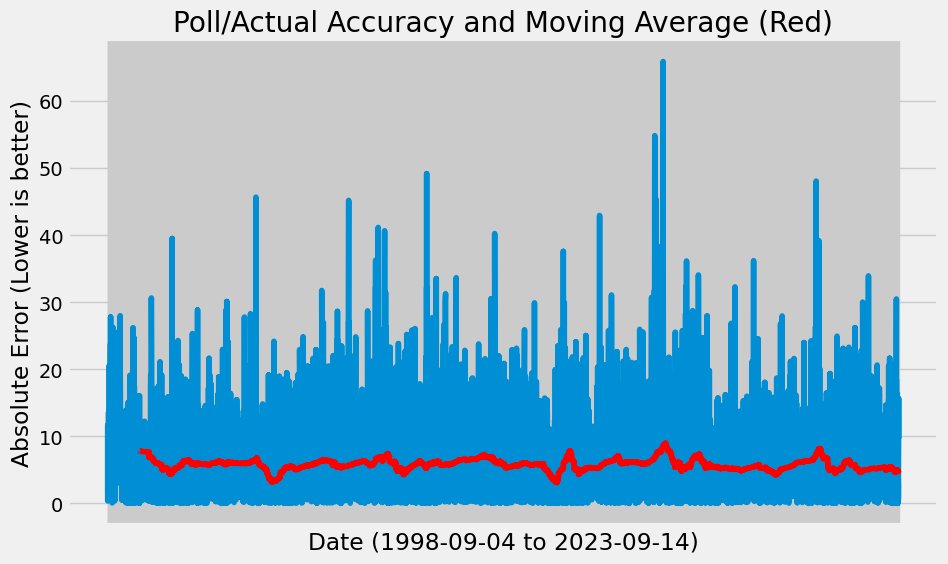

In [18]:
df['Moving_Average'] = df['accuracy'].rolling(window=500).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['accuracy'])
plt.plot(df.index, df['Moving_Average'], color='red')
plt.title('Poll/Actual Accuracy and Moving Average (Red)')
plt.xlabel('Date (1998-09-04 to 2023-09-14)')
plt.ylabel('Absolute Error (Lower is better)')
plt.tick_params(axis='x', labelbottom=False)
plt.grid(True)
plt.show()

In [10]:
## No trend shown in moving average.

In [11]:
df = df.set_index('race')
df = df.sort_values(by='race')
df
race_counts = df.index.value_counts()
race_counts

race
2020_Pres-G_US       249
2008_Pres-G_US       205
2016_Pres-G_US       178
2012_Pres-G_US       176
2000_Pres-G_US       160
                    ... 
2014_House-G_CO-6      1
2014_House-G_CT-5      1
2014_House-G_DE-1      1
1998_House-G_OH-6      1
1998_House-G_OR-1      1
Name: count, Length: 2466, dtype: int64

In [12]:
## plt.bar(race_counts.index, race_counts.values)

## Add labels and title
## plt.xlabel('Race')
## plt.ylabel('Count')
## plt.title('Race Count by Type')

## Display the plot
## plt.show()

Probability Poll Matches Actual: 0.7899442978598652
Correlation Poll and Actual: 0.5671011345843903
Correlation Sample Size and Correct Prediction: -0.009895352225584615


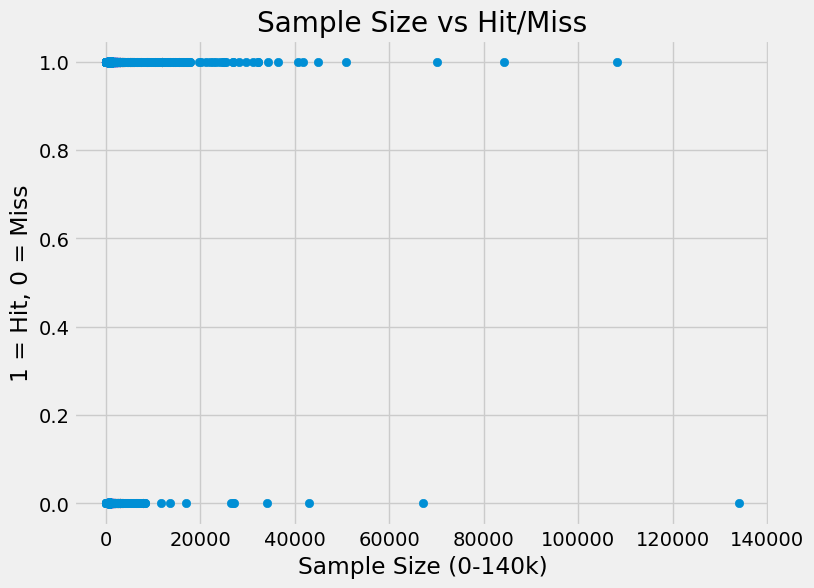

In [13]:
## Part D

## Margin Poll Context: In races between a Democrat and a Republican, positive values indicate a Democratic lead; negative values a Repubican lead. 
## Margin Actual Context: In races between a Democrat and a Republican, positive values indicate a Democratic win; negative values a Republican win.

df['pollsign'] = np.where(df['margin_poll'] > 0, 1, 0)
df['actualsign'] = np.where(df['margin_actual'] > 0, 1, 0)
df['signdelta'] = df['pollsign'] - df['actualsign']
df['resultsign'] = np.where(df['signdelta'] == 0, 1, 0)
resultcount = (df['resultsign'] == 1).value_counts()

pCorrect = resultcount[True]/len(df)
print(f'Probability Poll Matches Actual: {pCorrect}')

corrpollact = df['pollsign'].corr(df['actualsign'])
print("Correlation Poll and Actual:", corrpollact)

corrsampresult = df['samplesize'].corr(df['resultsign'])
print("Correlation Sample Size and Correct Prediction:", corrsampresult)

plt.figure(figsize=(8, 6))
plt.scatter(df['samplesize'], df['resultsign'])
plt.title('Sample Size vs Hit/Miss')
plt.xlabel('Sample Size (0-140k)')
plt.ylabel('1 = Hit, 0 = Miss')
plt.grid(True)
plt.show()

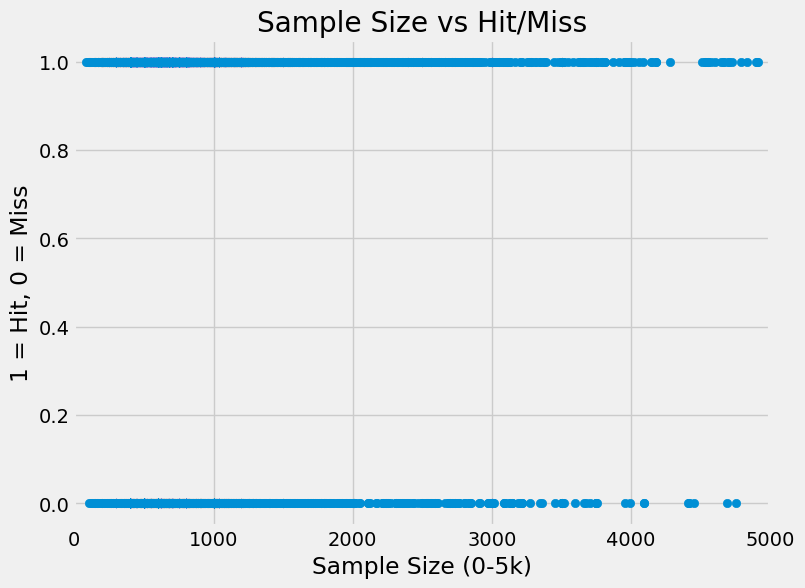

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(df['samplesize'], df['resultsign'])
plt.title('Sample Size vs Hit/Miss')
plt.xlabel('Sample Size (0-5k)')
plt.ylabel('1 = Hit, 0 = Miss')
plt.grid(True)
plt.xlim(0, 5000)
plt.show()

Correlation Sample Size and Accuracy: -0.05411200507190975


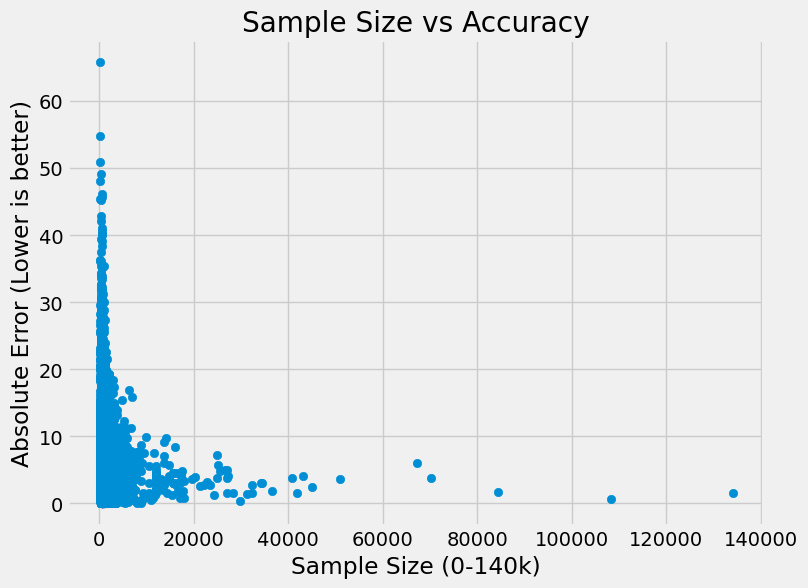

In [15]:
corr = df['samplesize'].corr(df['accuracy'])
print("Correlation Sample Size and Accuracy:", corr)

plt.figure(figsize=(8, 6))
plt.scatter(df['samplesize'], df['accuracy'])
plt.title('Sample Size vs Accuracy')
plt.xlabel('Sample Size (0-140k)')
plt.ylabel('Absolute Error (Lower is better)')
plt.grid(True)
plt.show()

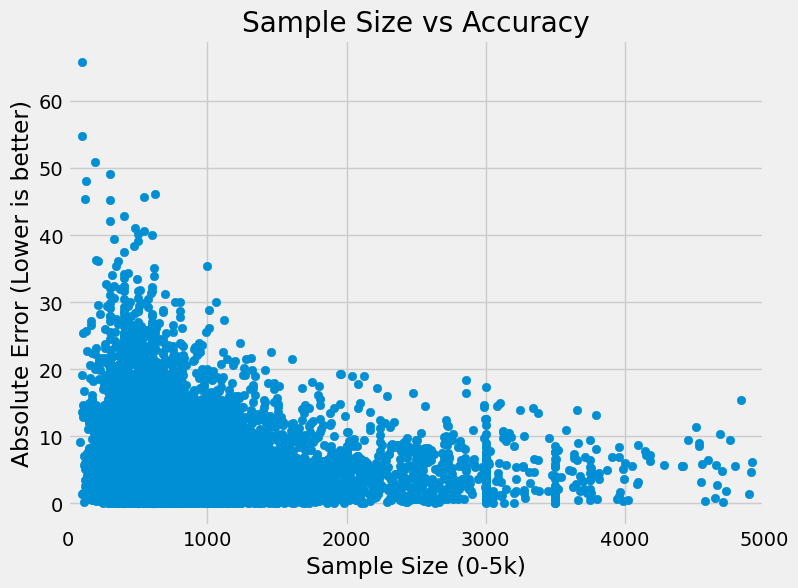

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(df['samplesize'], df['accuracy'])
plt.title('Sample Size vs Accuracy')
plt.xlabel('Sample Size (0-5k)')
plt.ylabel('Absolute Error (Lower is better)')
plt.grid(True)
plt.xlim(0, 5000)
plt.show()

In [17]:
## Diminishing returns beyond the 1000 to 2000 range, curve flattens.